# 1. Métriques de régression #

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [4]:
y = np.array([1, 2, 2, 3, 5, 2])
y_pred = np.array([5, 2, 2, 5, 7, 1000])

print("MAE : ", mean_absolute_error(y, y_pred))
print("MSE : ", mean_squared_error(y, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y, y_pred)))
print("median abs err :", median_absolute_error(y, y_pred))

MAE :  167.66666666666666
MSE :  166004.66666666666
RMSE :  407.43670265044443
median abs err : 2.0


In [5]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

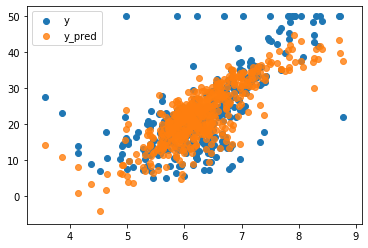

In [6]:
boston = load_boston()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X[:, 5], y, label = "y")
plt.scatter(X[:, 5], y_pred, alpha = 0.8, label = "y_pred")
plt.legend()

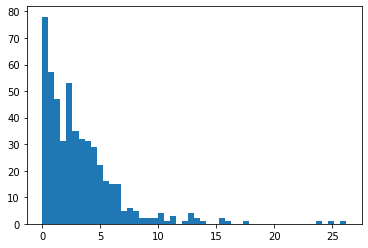

In [7]:
err_hist = np.abs(y - y_pred)
plt.hist(err_hist, bins = 50)
plt.show()

In [8]:
model.score(X, y)

0.7406426641094095

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(LinearRegression(), X, y, cv = 3, scoring = "neg_mean_squared_error")

array([ -20.63230588,  -34.48294871, -451.90968255])

In [11]:
cross_val_score(LinearRegression(), X, y, cv = 3, scoring = "neg_mean_absolute_error")

array([ -3.32352337,  -4.27948547, -13.47752829])

### Création de métriques ###

Text(0, 0.5, 'y')

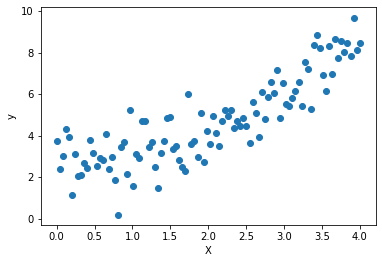

In [12]:
np.random.seed(0)

m = 100
X = np.linspace(0, 4, m).reshape(m, 1)
y = 2 + X**1.3 + np.random.randn(m, 1)
y = y.ravel()

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

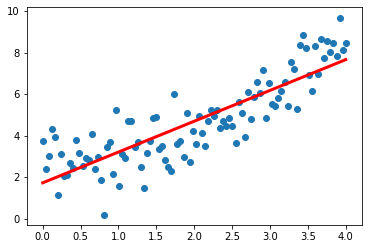

In [13]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c = "r", lw = 3)

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

0.8739397321740953

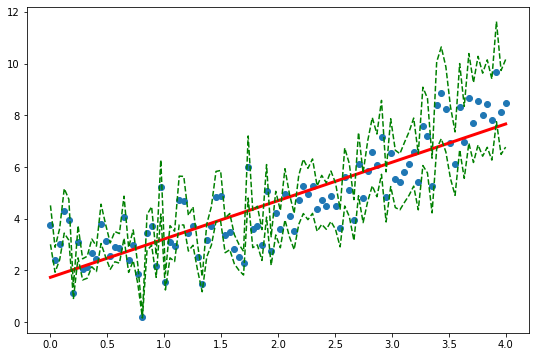

In [15]:
plt.figure(figsize = (9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c = "r", lw = 3)
plt.plot(X, y + y*0.2, c = "g", ls = "--")
plt.plot(X, y - y*0.2, c = "g", ls = "--")

In [16]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2))/y.size

custom_metric(y, y_pred)

0.63

In [17]:
from sklearn.metrics import make_scorer

In [18]:
custom_score = make_scorer(custom_metric, greater_is_better = True)

In [19]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [20]:
cross_val_score(LinearRegression(), X, y, cv = 3, scoring = custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

In [21]:
from sklearn.svm import SVR

model = SVR(kernel = "rbf", degree = 3)
params = {"gamma" : np.arange(0.1, 1, 0.05)}

grid = GridSearchCV(model, param_grid = params, cv = 3, scoring = custom_score)

grid.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(custom_metric), verbose=0)

In [22]:
best_model = grid.best_estimator_

In [23]:
y_pred = best_model.predict(X)

custom_metric(y, y_pred)

0.64

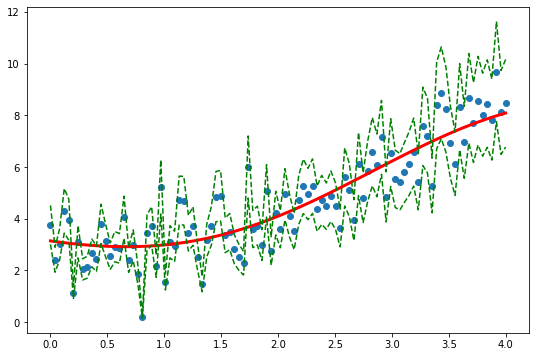

In [24]:
plt.figure(figsize = (9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c = "r", lw = 3)
plt.plot(X, y + y*0.2, c = "g", ls = "--")
plt.plot(X, y - y*0.2, c = "g", ls = "--")

In [25]:
# exercice

def f_RMSE(y, y_pred):
    return np.sqrt(1/y.size * np.sum((y - y_pred)**2))

f_RMSE(y, y_pred)

0.9443001063855672

In [26]:
RMSE = make_scorer(f_RMSE, greater_is_better = False)

In [27]:
model = SVR(kernel = "rbf", degree = 3)
params = {"gamma" : np.arange(0.1, 1, 0.05)}

grid = GridSearchCV(model, param_grid = params, cv = 3, scoring = RMSE)

grid.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f_RMSE, greater_is_better=False), verbose=0)

In [28]:
best_model = grid.best_estimator_

In [29]:
y_pred = best_model.predict(X)

f_RMSE(y, y_pred)

0.9447560386390728

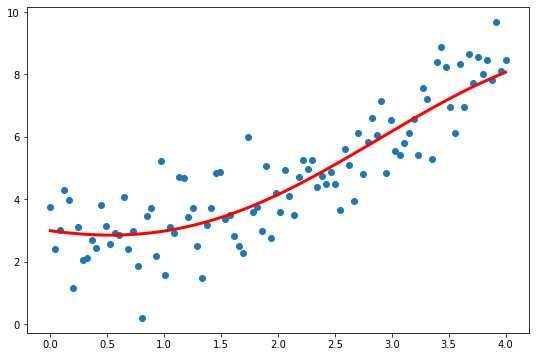

In [30]:
plt.figure(figsize = (9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, c = "r", lw = 3)

# 2. Pre-Processing #

## 2.1. Encoders ##

### LabelEncoder ###

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
y = np.array(["Chat", "Chien", "Chat", "Oiseau"])

In [33]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [34]:
encoder.classes_

array(['Chat', 'Chien', 'Oiseau'], dtype='<U6')

In [35]:
encoder.transform(y)

array([0, 1, 0, 2], dtype=int64)

In [36]:
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [37]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

### OrdinalEncoder ###

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
X = np.array([["Chat", "Poils"],
              ["Chien", "Poils"],
              ["Chat", "Poils"],
              ["Oiseau", "Plume"]])

In [40]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

### LabelBinarizer ###

In [41]:
from sklearn.preprocessing import LabelBinarizer

In [42]:
y = np.array(["Chat", "Chien", "Chat", "Oiseau"])

In [43]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [44]:
encoder = LabelBinarizer(sparse_output = True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

### OneHotEncoder ###

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
X = np.array([["Chat", "Poils"],
              ["Chien", "Poils"],
              ["Chat", "Poils"],
              ["Oiseau", "Plume"]])

In [47]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## 2.2. Normalisation ##

### Normalisation MinMax ###

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
X = np.array([[70], 
              [80], 
              [120]])

In [50]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [51]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

In [52]:
from sklearn.datasets import load_iris

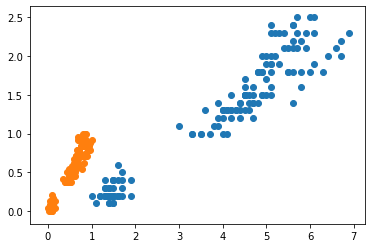

In [53]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3])
plt.show()

### Standardisation ###

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
X = np.array([[70], 
              [80], 
              [120]])

In [56]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

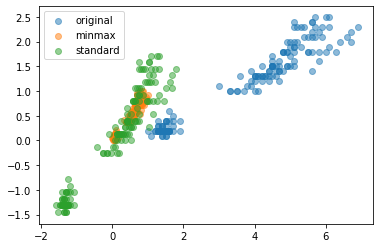

In [57]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = "original", alpha = 0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = "minmax", alpha = 0.5)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label = "standard", alpha = 0.5)
plt.legend()
plt.show()

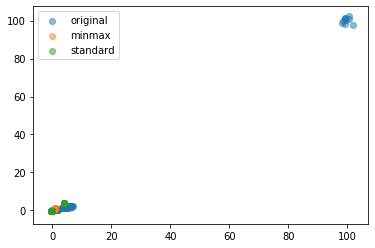

In [58]:
iris = load_iris()
X = iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = "original", alpha = 0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = "minmax", alpha = 0.5)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label = "standard", alpha = 0.5)
plt.legend()
plt.show()

### RobustScaler ###

In [59]:
from sklearn.preprocessing import RobustScaler

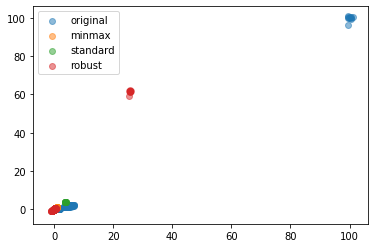

In [60]:
iris = load_iris()
X = iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = "original", alpha = 0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = "minmax", alpha = 0.5)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label = "standard", alpha = 0.5)
plt.scatter(X_robust[:, 2], X_robust[:, 3], label = "robust", alpha = 0.5)
plt.legend()
plt.show()

## 2.3. Autres Transformers ##

### PolynomialFeatures ###

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
X = np.array([[1],
             [2],
             [0.5]])

In [63]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [64]:
from sklearn.linear_model import LinearRegression

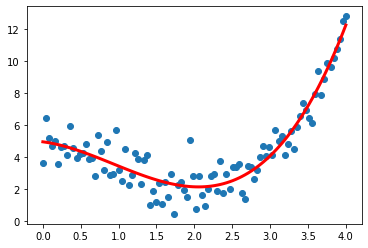

In [65]:
X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c = "red", lw = 3)

### Transformations non-linéaires ###

In [66]:
from sklearn.preprocessing import PowerTransformer

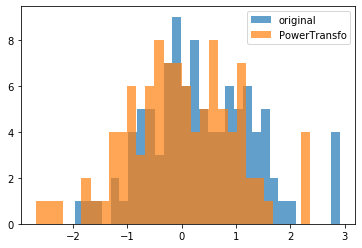

In [67]:
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:, 0], bins=30, alpha=0.7, label="original")
plt.hist(X2[:, 0], bins=30, alpha=0.7, label = "PowerTransfo")
plt.legend()
plt.show()

In [68]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [69]:
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [70]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [71]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [72]:
from sklearn.preprocessing import FunctionTransformer

In [73]:
Mon_transformer = FunctionTransformer(func = np.log1p, inverse_func = np.expm1)

In [74]:
Mon_transformer.fit_transform(X)

array([[0.        ],
       [0.44183275],
       [0.7472144 ],
       [0.98082925],
       [1.17007125],
       [1.32913595],
       [1.46633707],
       [1.58696506],
       [1.69459572],
       [1.79175947]])

# 3. Pipeline #

## 3.1. Création de Pipeline ##

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [76]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 2, 0])

### Composite ###

In [78]:
from sklearn.pipeline import make_pipeline

In [79]:
model = make_pipeline(StandardScaler(), 
                      SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0])

### GridSearchCV ###

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))

params = {
    "polynomialfeatures__degree" : [2, 3, 4],
    "sgdclassifier__penalty" : ["l1", "l2"]
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                     

In [82]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l1'}

In [83]:
grid.score(X_test, y_test)

0.9333333333333333

In [84]:
# Sans pre-processing

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

### Datasets hétérogènes ###

In [85]:
import seaborn as sns

In [86]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [88]:
numerical_features = ["pclass", "age", "fare"]
categorical_features = ["sex", "deck", "alone"]

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
numerical_pipeline = make_pipeline(SimpleImputer(), 
                                   StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), 
                                   OneHotEncoder())

In [91]:
from sklearn.compose import make_column_transformer

In [92]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

In [93]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

### Pipeline parallèles ###

In [94]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

In [95]:
numerical_features = X[["age", "fare"]]

In [96]:
from sklearn.pipeline import make_union

In [97]:
pipeline_bin = make_pipeline(SimpleImputer(), Binarizer())
pipeline = make_union(StandardScaler(), pipeline_bin)

In [98]:
pipeline.fit_transform(numerical_features).shape

(891, 4)

## 3.2 Nettoyage des données ##

### SingleImputer ###

In [124]:
from sklearn.impute import SimpleImputer

In [107]:
X = np.array([[10, 3],
            [0, 4],
            [5, 3],
            [np.nan, 3]])

In [108]:
imputer = SimpleImputer(missing_values = np.nan,
             strategy = "mean")

imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [109]:
X_test = np.array([[12, 5],
                   [40, 2],
                   [5, 5],
                   [np.nan, np.nan]])

imputer.transform(X_test)

array([[12.  ,  5.  ],
       [40.  ,  2.  ],
       [ 5.  ,  5.  ],
       [ 5.  ,  3.25]])

### KNNImputer ###

In [103]:
from sklearn.impute import KNNImputer

In [104]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

In [105]:
imputer = KNNImputer(n_neighbors = 1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

### MissingIndicator ###

In [110]:
from sklearn.impute import MissingIndicator

In [113]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, np.nan]])

In [114]:
MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [116]:
pipeline = make_union(SimpleImputer(strategy = "constant", fill_value = -99),
                     MissingIndicator())

pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])

### Application ###

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [118]:
titanic = sns.load_dataset("titanic")
X = titanic[["pclass", "age"]]
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [119]:
model = make_pipeline(KNNImputer(), SGDClassifier())

In [120]:
params = {
    "knnimputer__n_neighbors" : [1, 2, 3, 4]
}

In [121]:
grid = GridSearchCV(model, param_grid=params, cv=5)

In [122]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knnimputer',
                                        KNNImputer(add_indicator=False,
                                                   copy=True,
                                                   metric='nan_euclidean',
                                                   missing_values=nan,
                                                   n_neighbors=5,
                                                   weights='uniform')),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                           

In [123]:
grid.best_params_

{'knnimputer__n_neighbors': 3}

# 4. Feature Selection #

### Variance Threshold ###

In [1]:
from sklearn.feature_selection import VarianceThreshold

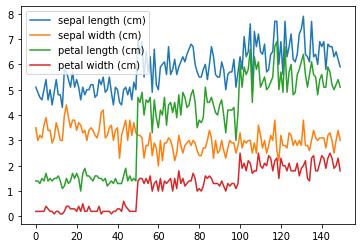

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [4]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [6]:
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [8]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### Select KBest ###

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

In [10]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [13]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

### Select From Model ###

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [18]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold = "mean")
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

In [21]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [25]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [27]:
selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

### Recursive Feature Selection ###

In [28]:
from sklearn.feature_selection import RFE, RFECV

In [31]:
selector = RFECV(SGDClassifier(random_state=0),
                 step=1,
                 min_features_to_select=2,
                 cv=5)

selector.fit(X, y)
selector.ranking_

array([2, 1, 1, 1])

In [32]:
selector.grid_scores_

array([0.8       , 0.84666667, 0.77333333])